# Modelo del rendimiento de una cuenta de ahorro

<img style="center" src="https://static.pexels.com/photos/9660/business-money-pink-coins.jpg" width="500px" height="200px" alt="atom"/>

> **¿Tiene el dinero el mismo valor a lo largo del tiempo?** La respuesta es *no*. Todos lo hemos vivido. 

> Dos situaciones básicas:
1. <font color=blue>Inflación</font>: ¿Cuánto dinero necesitabas para comprar unas papas y un refresco hace 10 años? ¿Cuánto necesitas hoy?
2. <font color=blue>Interés</font>: no es lo mismo tener $\$10000$ MXN disponibles hoy a recibir $\$10000$ MXN en un año, pues los primeros pueden ser invertidos en un negocio o una cuenta bancaria para generar **interés**. Por lo tanto los $\$10000$ MXN disponibles hoy valen más que los $\$10000$ MXN que se recibirán en un año.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)

Referencias:
- http://www.sympy.org
- http://matplotlib.org
- http://www.numpy.org
- http://ipywidgets.readthedocs.io/en/latest/index.html

___
## Interés
Nos centraremos en como cambia el valor del dinero en el tiempo debido al **interés**. Existen dos tipos:

### Capitalización por interés simple
Este tipo de interés se calcula <font color=red>única y exclusivamente sobre la cantidad original que se invirtió</font>. Como consecuencia, el interés generado no forma parte del dinero que se invierte, es decir, los <font color=blue>intereses no ganan intereses</font>.

Suponga que se tiene un capital inicial $C_0$ y se invierte a un plazo de $k$ periodos (pueden ser meses, trimestres, semestres, años...) a una tasa de **interés simple** por periodo $i$. Al final del primer periodo, el capital $C_1$ que se obtiene es:

$$C_1=C_0+iC_0=C_0(1+i).$$

De la misma manera, como el interés solo se calcula sobre el capital inicial, al final del segundo periodo, el capital $C_2$ que se obtiene es:

$$C_2=C_1+iC_0=C_0+iC_0+iC_0=C_0(1+2i).$$

Así, al final del $k-$ésimo periodo, el capital $C_k$ que se obtiene es:

$$C_k=C_{k-1}+iC_0=C_0+kiC_0=C_0(1+ki).$$

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés simple del $0.8\%$ mensual. 

> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

In [1]:
C=11000
i=0.008
C0=10000

k=((C/C0)-1)/i
print(round(k))

13


Necesitará de 13 meses para que su inversión de 10,000 genere intereses de 1,000

> <font color=blue>**Actividad.**</font>
1. ¿Qué pasa si el interés no es del $0.8\%$ mensual sino del $1\%$ mensual?
2. ¿Qué pasa si la meta no son $\$11000$ MXN si no $\$12000$ MXN?

In [2]:
# 1.
C=11000
i=0.01
C0=10000

k=((C/C0)-1)/i
print(round(k))

10


In [3]:
# 2.
C=12000
i=0.008
C0=10000

k=((C/C0)-1)/i
print(round(k))

25


> Una gráfica que nos permite ilustrar la situación anterior se puede realizar de la siguiente manera.

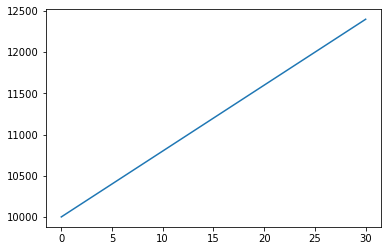

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def int(k,C0=10000,i=0.008):
    return C0*(1+(k*i))

k=np.linspace(0,30,31)

plt.figure()
plt.plot(int(k))

Como se esperaba, el capital en el $k-$ésimo periodo $C_k=C_0(1+ki)$ crece linealmente con $k$.

### Capitalización por interés compuesto
El capital que genera el interés simple permanece constante todo el tiempo de duración de la inversión. En cambio, el que produce el interés compuesto en un periodo se <font color=red>convierte en capital en el siguiente periodo</font>. Esto es, el interés generado al final de un periodo <font color=blue>se reinvierte para el siguiente periodo para también producir interés</font>.

Suponga que se tiene un capital inicial $C_0$, y se va a ceder el uso de este capital por un periodo de tiempo determinado a una tasa de interés $i$. El capital que se obtiene al final del primer periodo $C_1$ se puede calcular por

$$C_1=C_0(1+i).$$ 

Si la anterior suma se vuelve a ceder a la misma tasa de interés, al final del periodo dos el capital $C_2$ es 

$$C_2=C_1(1+i)=C_0(1+i)^2.$$

Si se repite el anterior proceso $k$ veces, el capital al final del $k-$ésimo periodo $C_k$ es 

$$C_k=C_{k-1}(1+i)=C_0(1+i)^k.$$

**Referencia**:
- https://es.wikipedia.org/wiki/Inter%C3%A9s_compuesto.

$$ C_k = C_0(1+i)^k.$$

$$ \frac{C_k}{C_0} = (1+i)^k $$

$$ \log{(\frac{C_k}{C_0})} = k\log{(1+i)}$$ 

$$ k = \frac{\log{(\frac{C_k}{C_0})}}{\log{(1+i)}}$$

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del $0.8\%$ mensual. 

> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

In [5]:
Ck=11000
C0=10000
r=0.008

k=np.log(Ck/C0)/np.log(1+r)
print(round(k))

12


> Una gráfica que nos permite ilustrar la situación anterior se puede realizar de la siguiente manera.

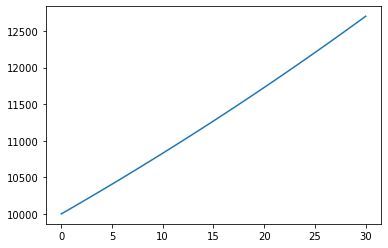

In [6]:
def compuesto(k,C0=10000,i=0.008):
    return C0*((1+i)**k)

k=np.linspace(0,30,31)

plt.figure()
plt.plot(compuesto(k))

El capital en el $k-$ésimo periodo $C_k=C_0(1+i)^k$ crece de manera exponencial con $k$.

> <font color=blue>**Actividad.**</font>
> - Modificar el código anterior para dejar fija la meta de ahorro y variar la tasa de interés compuesta.

Con 0.005 de interés se necesitan: 19 meses
Con 0.008 de interés se necesitan: 12 meses
Con 0.01 de interés se necesitan: 10 meses
Con 0.05 de interés se necesitan: 2 meses
Con 0.1 de interés se necesitan: 1 meses


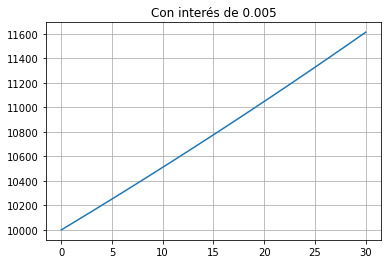

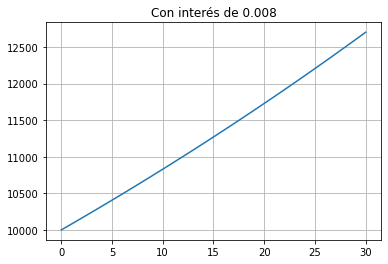

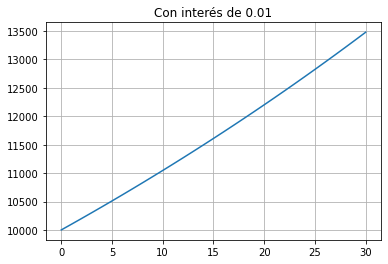

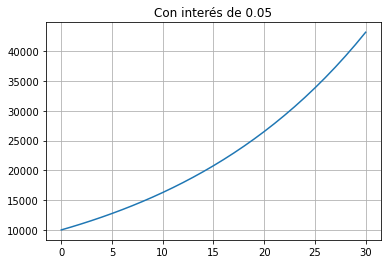

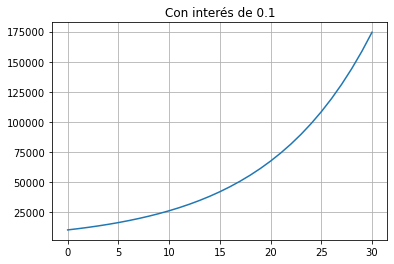

In [7]:
def meses(r,C0=10000,Ck=11000):
    return np.log(Ck/C0)/np.log(1+r)

tasas=[0.005,0.008,0.01,0.05,0.1]
k=np.linspace(0,30,31)
ks=[]

for i in tasas:
    plt.figure()
    plt.plot(compuesto(k,i=i))
    plt.title('Con interés de '+str(i))
    plt.grid()
    
    ks.append(round(np.log(11000/10000)/np.log(1+i)))
    
for i in range(5):
    print('Con '+str(tasas[i])+' de interés se necesitan: '+str(ks[i])+' meses')

### Capitalización continua de intereses
La capitalización continua se considera un tipo de capitalización compuesta, en la que a cada instante de tiempo $t$ se capitalizan los intereses. Es decir, la frecuencia de capitalización es infinita (o, equivalentemente, el periodo de capitalización tiende a cero).

Suponga que se tiene un capital inicial $C_0$, y que el capital acumulado en el tiempo $t$ es $C(t)$. Queremos saber cuanto será el capital pasado un periodo de tiempo $\Delta t$, dado que la tasa de interés efectiva para este periodo de tiempo es $i$. De acuerdo a lo anterior tenemos

$$C(t+\Delta t)=C(t)(1+i)=C(t)(1+r\Delta t),$$

donde $r=\frac{i}{\Delta t}$ es la tasa de interés instantánea. Manipulando la anterior expresión, obtenemos

$$\frac{C(t+\Delta t)-C(t)}{\Delta t}=r\; C(t).$$


$$ \lim_{\Delta t}\to 0 $$


Haciendo $\Delta t\to 0$, obtenemos la siguiente ecuación diferencial 

$$\frac{d C(t)}{dt}=r\; C(t),$$

sujeta a la condición inicial (monto o capital inicial) $C(0)=C_0$.

La anterior, es una ecuación diferencial lineal de primer orden, para la cual se puede calcular la *solución analítica*.

In [8]:
import sympy as sp

def C(r,C):
    return r*C

C=sp.Function('C')
t=sp.var('t')
r=sp.Symbol('r',constant=True)

sp.dsolve((sp.diff(C(t),t)/r)-C(t),C(t))

Eq(C(t), C1*exp(r*t))

$$C(t) = C_0e^{rt}$$

La equivalencia entre la tasa de interés compuesta $i$ y la tasa de interés instantánea $r$ viene dada por

$$e^r=1+i.$$

___
¿Cómo podemos calcular la *solución numérica*?

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del $0.8\%$ mensual. 

> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuánto tiempo se debe dejar invertido el dinero?

> Muestre una gráfica que ilustre la situación.

[ 200.          212.52289836  315.80271183  421.16891592  528.66365853
  638.32993899  750.21162527  864.35347153  980.80113604 1099.60119942
 1220.80118328 1344.44956922 1470.59581825 1599.29039054 1730.58476566
 1864.53146308 2001.18406329 2140.59722914 2282.82672776 2427.92945284
 2575.96344741 2726.98792704 2881.06330353 3038.25120909 3198.61452099
 3341.97945119]
[10000.         10012.52289836 10115.80271183 10221.16891592
 10328.66365853 10438.32993899 10550.21162527 10664.35347153
 10780.80113604 10899.60119942 11020.80118328 11144.44956922
 11270.59581825 11399.29039054 11530.58476566 11664.53146308
 11801.18406329 11940.59722914 12082.82672776 12227.92945284
 12375.96344741 12526.98792704 12681.06330353 12838.25120909
 12998.61452099 13141.97945119]
16483.958902374154


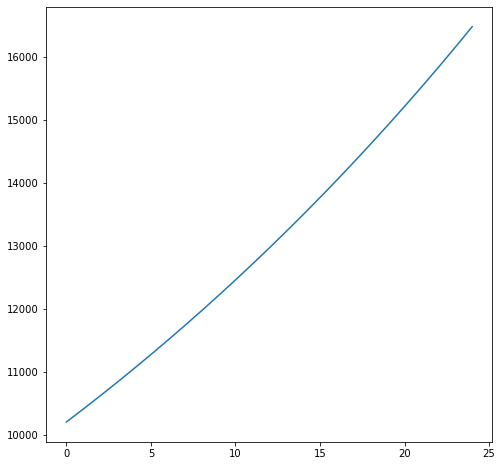

In [61]:
from scipy.integrate import solve_ivp, odeint

def fun(t,C,r):
    return r*((C[0])+C[1])

C=np.array([10000,200])
r=0.01
t=[0,24]

sol=solve_ivp(fun,t,C,args=(r,),max_step=1)

plt.figure(figsize = [8,8])
plt.plot(sol.t,sol.y[0,:]+sol.y[1,:])
print(sol.y[1,:])
print(sol.y[0,:])
print(sol.y[0,-1]+sol.y[1,-1])

In [ ]:
# 12712 + 5143 = 17,855.26

___
## Tabla de abonos
Como aplicación importante del concepto de interés compuesto se encuentra la creación de un modelo de cuenta de ahorro.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)
- http://pbpython.com/amortization-model.html
- https://pbpython.com/amortization-model-revised.html

Ecuación de balance

$$ B = C_0 (1 + i)^k + \frac{A(1 + i)^{k-1} - 1}{i} $$


conda install -c conda-forge numpy-financial

In [10]:
# import numpy_financial as npf

In [11]:
# npf.pmt?